<a href="https://colab.research.google.com/github/snehagandla30/SIH-HACKATHON/blob/main/CodeHashiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving multilingual_comments.csv to multilingual_comments.csv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=0c998e08d79d63db3eedd5babee60741efff91f15ba4c427871d464303ed7e46
  Stored in directory: /root/.cache/pip/wheels/3c/bc/9d/266e27289b9019680d65d9b608c37bff1eff565b001c977ec5
Successfully built langid
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra
  fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji
  fonts-noto-core fonts-noto-extra fonts-noto-mono fonts-noto-ui-core
  fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remov

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Your max_length is set to 20, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 20, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 20, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 20, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_le

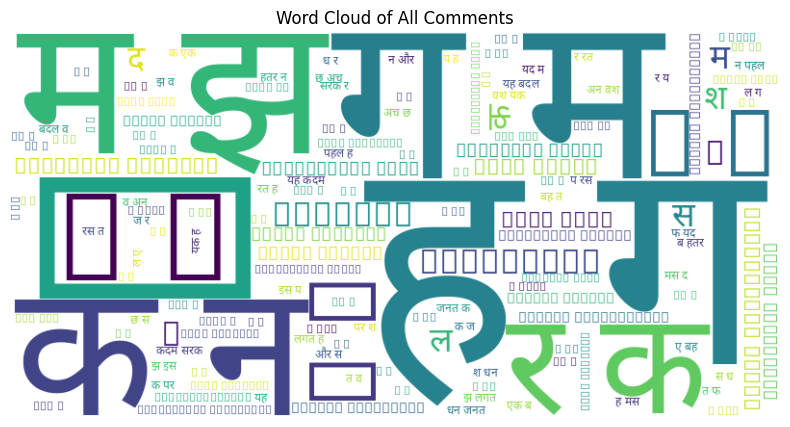

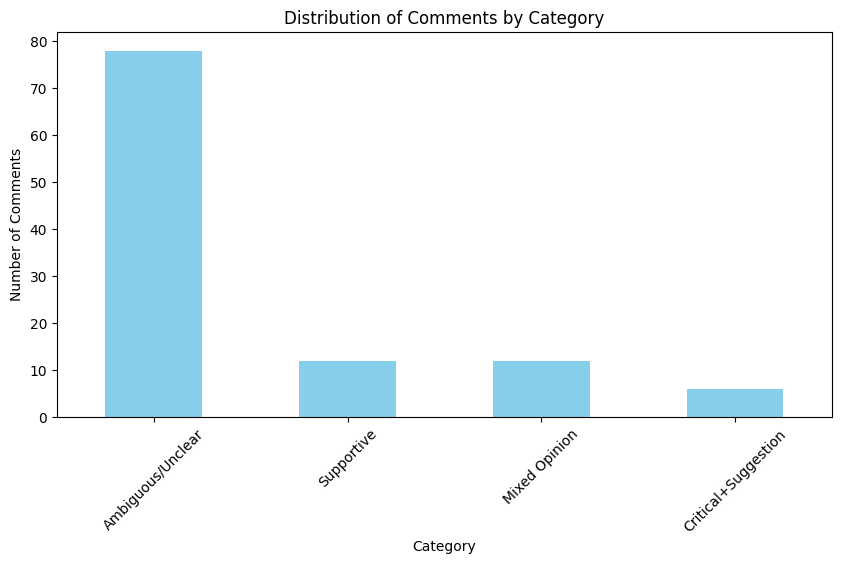

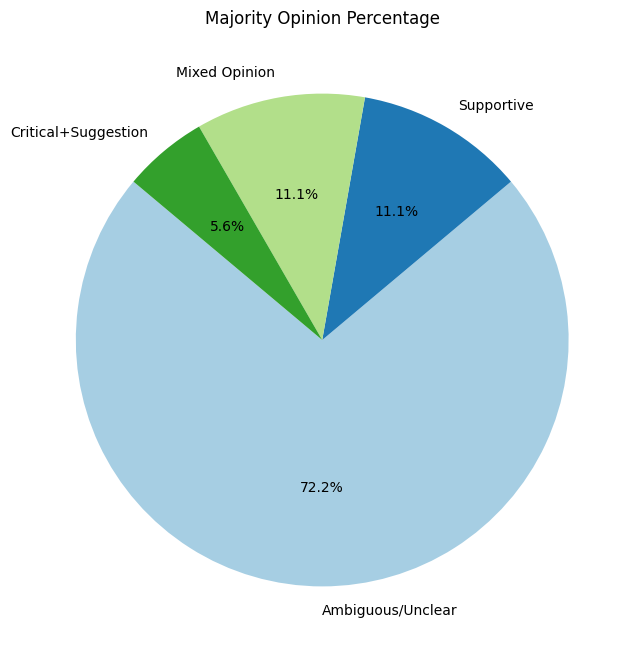

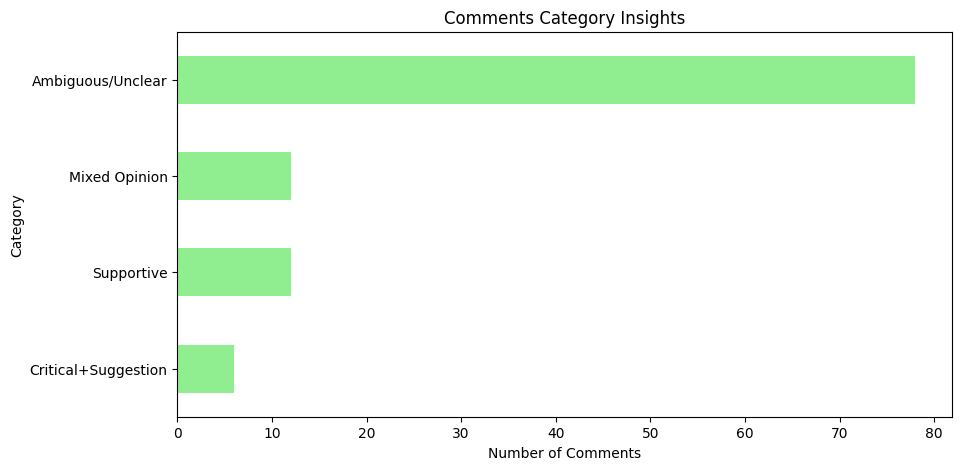

Majority opinion: Ambiguous/Unclear (78 comments)


,id,language,comment,sentiment,clean_comment,lang,summary,category
0,1,English,"I strongly support this amendment, it will hel...",Positive,I strongly support this amendment it will help...,en,I strongly support this amendment it will help...,Ambiguous/Unclear
1,2,English,"This proposal seems unclear and confusing, nee...",Negative,This proposal seems unclear and confusing need...,en,"""This proposal seems unclear and confusing nee...",Ambiguous/Unclear
2,3,English,"The draft misses important points, please reco...",Neutral,The draft misses important points please recon...,en,The draft misses important points please recon...,Ambiguous/Unclear
3,4,English,"Excellent step forward, very well thought out.",Positive,Excellent step forward very well thought out,en,. Excellent step forward very well thought out...,Supportive
4,5,English,"This regulation might harm startups, not a goo...",Negative,This regulation might harm startups not a good...,en,This regulation might harm startups not a good...,Supportive


In [ ]:
# ----------------- 1️⃣ Install Libraries -----------------
!pip install pandas langid transformers torch wordcloud matplotlib
!apt-get install fonts-noto -y

# ----------------- 2️⃣ Import Libraries -----------------
import pandas as pd
import re
import langid
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ----------------- 3️⃣ Load Dataset -----------------
df = pd.read_csv("multilingual_comments.csv")

# ----------------- 4️⃣ Preprocess Comments -----------------
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^A-Za-z0-9अ-హా-౸\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_comment"] = df["comment"].apply(clean_text)
df["lang"] = df["comment"].apply(lambda x: langid.classify(str(x))[0])

# ----------------- 5️⃣ Summarization -----------------
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
df["summary"] = df["clean_comment"].apply(
    lambda x: summarizer(x, max_length=20, min_length=5, do_sample=False)[0]['summary_text']
)

# ----------------- 6️⃣ Word Cloud -----------------
text = " ".join(df["clean_comment"])
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path="NotoSansDevanagari-Regular.ttf"
).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of All Comments")
plt.show()

# ----------------- 7️⃣ Categorize Comments (6 types) -----------------
def categorize_comment(text):
    text = text.lower()
    if any(x in text for x in ["good", "excellent", "great", "सही", "అద్భుతం"]):
        return "Supportive"
    elif any(x in text for x in ["bad", "poor", "terrible", "खराब", "చెడు"]):
        return "Purely Critical"
    elif any(x in text for x in ["suggest", "improve", "सुझाव", "సुझావు"]):
        return "Critical+Suggestion"
    elif any(x in text for x in ["how", "why", "क्या", "ఎందుకు"]):
        return "Query/Doubt"
    elif any(x in text for x in ["but", "लेकिन", "కానీ"]):
        return "Mixed Opinion"
    else:
        return "Ambiguous/Unclear"

df["category"] = df["clean_comment"].apply(categorize_comment)

# ----------------- 8️⃣ Visualization -----------------
category_counts = df["category"].value_counts()

# Bar chart
plt.figure(figsize=(10,5))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Comments by Category")
plt.xlabel("Category")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Majority Opinion Percentage")
plt.show()

# Horizontal bar chart
plt.figure(figsize=(10,5))
category_counts.sort_values().plot(kind='barh', color='lightgreen')
plt.title("Comments Category Insights")
plt.xlabel("Number of Comments")
plt.ylabel("Category")
plt.show()

# ----------------- 9️⃣ Majority Opinion -----------------
majority_category = category_counts.idxmax()
majority_count = category_counts.max()
print(f"Majority opinion: {majority_category} ({majority_count} comments)")

# ----------------- 10️⃣ Preview Processed Data -----------------
df.head()
